In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import cv2

In [40]:
!unzip//content/Flowers-Dataset.zip

/bin/bash: unzip//content/Flowers-Dataset.zip: No such file or directory


In [41]:
img=cv2.imread('/content/2161283279_02ea3ff8d4.jpg')
img

array([[[ 29,  36,  23],
        [ 28,  37,  24],
        [ 29,  38,  25],
        ...,
        [ 16,  35,  18],
        [ 15,  34,  19],
        [ 14,  33,  18]],

       [[ 30,  37,  24],
        [ 29,  38,  25],
        [ 30,  39,  26],
        ...,
        [ 15,  34,  19],
        [ 14,  33,  18],
        [ 14,  32,  19]],

       [[ 29,  38,  25],
        [ 28,  38,  25],
        [ 28,  38,  25],
        ...,
        [ 15,  32,  18],
        [ 13,  32,  17],
        [ 13,  31,  18]],

       ...,

       [[  9,  23,  11],
        [  5,  23,  10],
        [  8,  26,  13],
        ...,
        [ 67,  81, 100],
        [ 69,  80, 100],
        [ 70,  80,  98]],

       [[  9,  26,  13],
        [  8,  25,  12],
        [  7,  27,  14],
        ...,
        [ 67,  75,  92],
        [ 71,  78,  93],
        [ 74,  79,  94]],

       [[ 10,  28,  15],
        [  9,  26,  13],
        [  7,  27,  14],
        ...,
        [ 55,  62,  77],
        [ 61,  67,  80],
        [ 63,  67,  78]]

In [42]:
import matplotlib.pyplot as plt

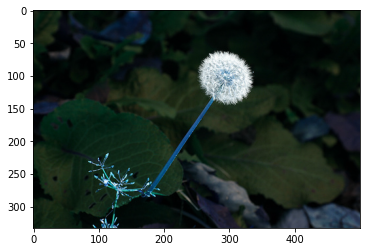

In [43]:
plt.imshow(img)

In [44]:
import numpy as np

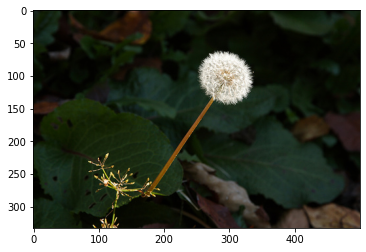

In [45]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

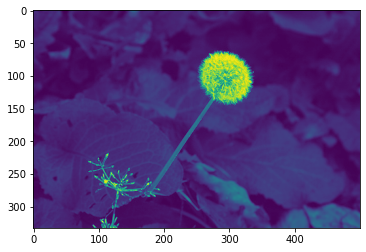

In [46]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

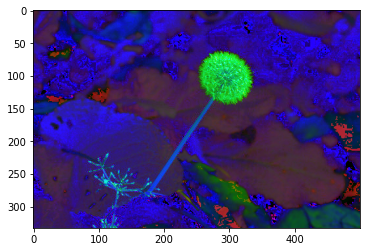

In [47]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

**IMAGE RESIZE**

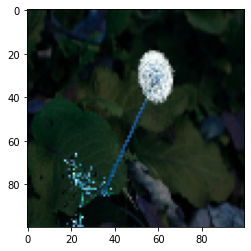

In [48]:
plt.imshow(cv2.resize(img,(100,100)))

In [49]:
rs = cv2.resize(img,(100,100))
print(img.shape)
print(rs.shape)

(333, 500, 3)
(100, 100, 3)


**IMAGE ROTATE**

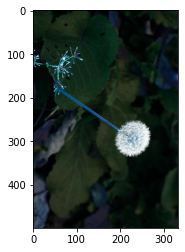

In [50]:
plt.imshow(cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE))

**IMAGE CROP**

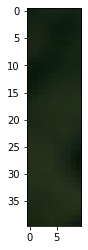

In [51]:
plt.imshow(img[10:50,20:30])

**IMAGE BLUR**

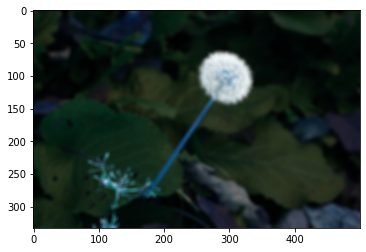

In [52]:
x=cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(x)

In [53]:
cv2.imwrite('image.jpg',img)

True

**IMAGE AUGMENTATION**

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [56]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [57]:
x_train=train_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [58]:
x_test=test_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [59]:
x_train.class_indices

{'.Trash-0': 0,
 '.file-revisions-by-id': 1,
 '.shortcut-targets-by-id': 2,
 'MyDrive': 3}

**INITIALIZING CNN AND CREATE MODEL**

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

**ADD LAYERS**

In [61]:
model=Sequential()

**INPUT LAYERS(CONVOLUTION,MAXPOOLING,FLATTEN)**

In [62]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [63]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [64]:
model.add(Flatten())

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


**HIDDEN LAYERS**

In [66]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**OUTPUT LAYERS**

In [67]:
model.add(Dense(5,activation='softmax'))

In [68]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
len(x_train)

1

**SAVE THE MODEL**

In [70]:
model.save('Flowers_classification_model1.h5')

**TEST THE MODEL**

In [71]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [72]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [73]:
img=image.load_img(r"/content/2161283279_02ea3ff8d4.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 54ms/step


'daisy'